# Final Project

In [8]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [9]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2021", 
                 password="5HOA&yn6$B", 
                 host="192.168.212.99", 
                 port=32771)

In [10]:
ph_shp = gpd.read_postgis('''
SELECT *
FROM gadm.ph
''', conn, geom_col='geom')
ph_shp.head()

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geom
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"MULTIPOLYGON (((120.62710 17.49300, 120.62177 ..."
1,2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"MULTIPOLYGON (((120.99042 17.39802, 120.98631 ..."
2,3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"MULTIPOLYGON (((120.70788 17.45395, 120.70621 ..."
3,4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"MULTIPOLYGON (((120.78956 17.41699, 120.78922 ..."
4,5,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"MULTIPOLYGON (((120.92917 17.41307, 120.92464 ..."


In [80]:
# ncrplus = ['Metropolitan Manila', 'Laguna', 'Cavite', 'Bulacan', 'Rizal', 'Bataan', 'Pampanga', 'Cavite', 'Batangas', 'Quezon']
# ncrplus_shp = ph_shp[ph_shp['name_1'].isin(ncrplus)]
# ncrplus_shp = ncrplus_shp[~ncrplus_shp['name_2'].str.lower().str.contains('lake')]

metro_manila_shp = ph_shp[ph_shp['name_1'].isin(['Metropolitan Manila'])]

In [28]:
from glob import glob
filepaths = glob('datasets/weather/*')

locations = []
for file in filepaths:
    df = pd.read_csv(file)
    location = file.split('/')[2].split()[0]
    longitude = df.loc[0, 'LONGITUDE']
    latitude = df.loc[0, 'LATITUDE']
    locations.append([location, longitude, latitude])

In [79]:
weather_stations = pd.DataFrame()
for location in locations:
    station = gpd.read_postgis('''SELECT ST_SetSRID(ST_MakePoint(%s, %s), 4326) as geom''', 
                                 conn, params=[location[1], location[2]])
    station.index = [location[0]]
    weather_stations = pd.concat([weather_stations, station])
weather_stations.head()

,geom
Vigan,POINT (120.35580 17.55533)
Laoag,POINT (120.53152 18.17809)
Aparri,POINT (121.63333 18.36667)
Tuguegarao,POINT (121.73061 17.63831)
Dagupan,POINT (120.35000 16.08333)


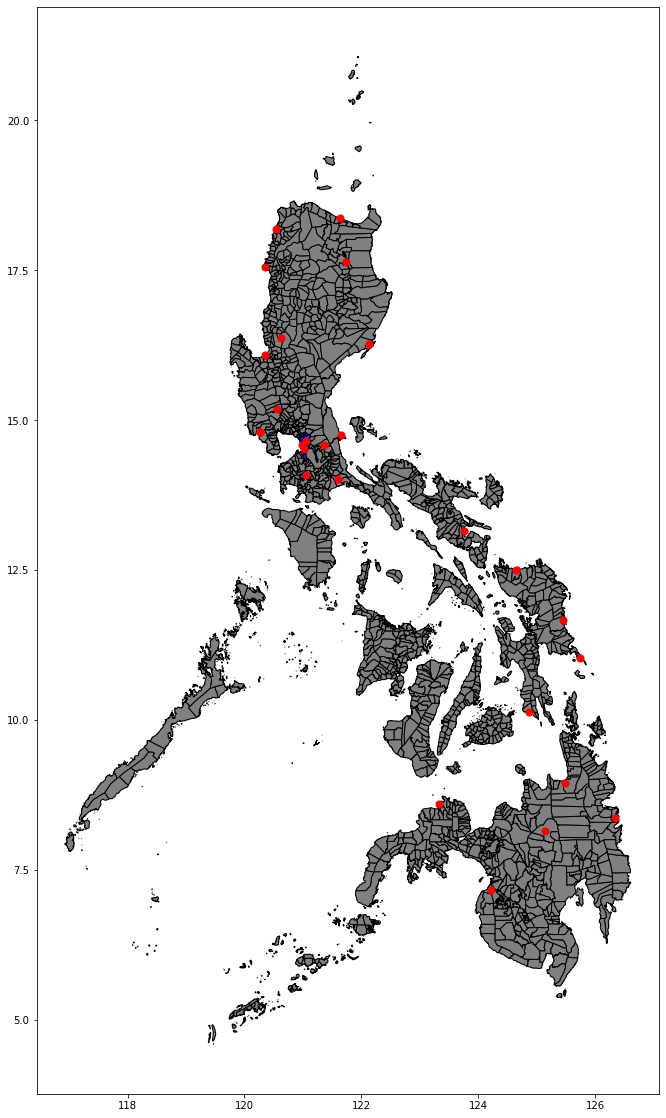

In [81]:
ax = ph_shp.plot(figsize=(20,20), color='gray', edgecolor='black')
metro_manila_shp.plot(ax=ax, color='blue', alpha=0.50);
weather_stations.plot(ax=ax, color='red', markersize=50);

In [ ]:
# fin_pop = pd.read_csv('financial_pop.csv')
# fin_pop.head()

In [ ]:

# mm_data = pd.merge(mm_shp, fin_pop[['pop', 'shp_province', 'shp_municipality']],
#                    how='left',
#                    left_on=['name_1', 'name_2'],
#                    right_on=['shp_province', 'shp_municipality'])
# mm_data = mm_data.fillna(0)
# mm_data.head()

In [ ]:

# ax = mm_data.plot(column='pop', 
#                   figsize=(10,10), 
#                   cmap='Reds',
#                   edgecolor='black',
#                   linewidth=1,
#                   legend=True)